In [29]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install torch
!pip install matplotlib
!pip install scipy
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
^C

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
sensor1 = pd.read_csv("raw_data/g1_sensor1.csv",names=["time","normal","type1","type2","type3"])
sensor2 = pd.read_csv("raw_data/g1_sensor2.csv",names=["time","normal","type1","type2","type3"])
sensor3 = pd.read_csv("raw_data/g1_sensor3.csv",names=["time","normal","type1","type2","type3"])
sensor4 = pd.read_csv("raw_data/g1_sensor4.csv",names=["time","normal","type1","type2","type3"])

In [ ]:
print("sensor 1의 데이터 크기",sensor1.shape)
print("sensor 1의 데이터 크기",sensor2.shape)
print("sensor 1의 데이터 크기",sensor3.shape)
print("sensor 1의 데이터 크기",sensor4.shape)

sensor 1의 데이터 크기 (190218, 5)
sensor 1의 데이터 크기 (184211, 5)
sensor 1의 데이터 크기 (196079, 5)
sensor 1의 데이터 크기 (183969, 5)


In [ ]:
from scipy import interpolate
x_new = np.arange(0,140,0.001)
y_new1 = []
y_new2 = []
y_new3 = []
y_new4 = []

for item in ["normal","type1","type2","type3"]:
    f_linear1 = interpolate.interp1d(sensor1["time"],sensor1[item],kind="linear");y_new1.append(f_linear1(x_new))
    f_linear2 = interpolate.interp1d(sensor2["time"],sensor2[item],kind="linear");y_new2.append(f_linear2(x_new))
    f_linear3 = interpolate.interp1d(sensor3["time"],sensor3[item],kind="linear");y_new3.append(f_linear3(x_new))
    f_linear4 = interpolate.interp1d(sensor4["time"],sensor4[item],kind="linear");y_new4.append(f_linear4(x_new))


In [ ]:
sensor1

,time,normal,type1,type2,type3
0,0.000000,-0.853307,-3.464579,0.555219,3.919664
1,0.000736,-0.740463,-2.448986,-0.234687,4.145351
2,0.001472,-0.138630,-1.922383,-0.009000,2.941685
3,0.002208,0.049443,-0.906790,-0.272301,2.603155
4,0.002944,-0.289088,-0.568259,-0.986978,1.361874
...,...,...,...,...,...
190213,139.996768,-1.156354,-2.696750,0.844491,-2.109427
190214,139.997504,-0.930666,-1.380241,0.919720,-2.222270
190215,139.998240,-0.554521,-2.132532,0.731647,-2.109427
190216,139.998976,-1.419655,-2.433448,1.183022,-3.087405


In [ ]:
normal_ = pd.concat([sensor1["normal"],sensor2["normal"],sensor3["normal"],sensor4["normal"]],axis=1)
type1_ = pd.concat([sensor1["type1"],sensor2["type1"],sensor3["type1"],sensor4["type1"]],axis=1)
type2_ = pd.concat([sensor1["type2"],sensor2["type2"],sensor3["type2"],sensor4["type2"]],axis=1)
type3_ = pd.concat([sensor1["type3"],sensor2["type3"],sensor3["type3"],sensor4["type3"]],axis=1)

normal_.columns = ["s1","s2","s3","s4"];type1_.columns = ["s1","s2","s3","s4"];type2_.columns = ["s1","s2","s3","s4"];type3_.columns = ["s1","s2","s3","s4"]

In [ ]:
normal_

,s1,s2,s3,s4
0,-0.853307,0.048823,-0.437626,-1.116226
1,-0.740463,-0.029477,-0.437626,-0.379672
2,-0.138630,-0.029477,0.280889,-1.271290
3,0.049443,0.009673,0.280889,-0.612268
4,-0.289088,0.009673,-0.257997,-0.689800
...,...,...,...,...
196074,NaN,NaN,-0.257427,NaN
196075,NaN,NaN,0.146738,NaN
196076,NaN,NaN,0.371273,NaN
196077,NaN,NaN,0.416181,NaN


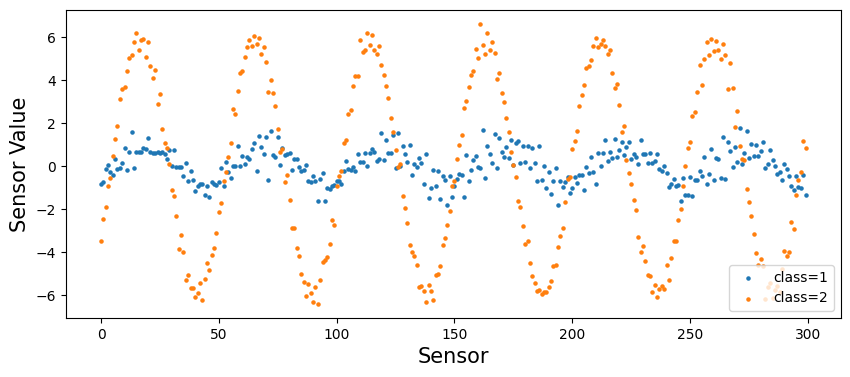

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(range(0,300),normal_["s1"][:300],label="class="+str(1),marker='o',s =5)
plt.scatter(range(0,300),type1_["s1"][:300],label="class="+str(2),marker='o',s =5)

plt.legend(loc="lower right")
plt.xlabel("Sensor",fontsize=15)
plt.ylabel("Sensor Value",fontsize=15)
plt.show()
plt.close()

<Axes: >

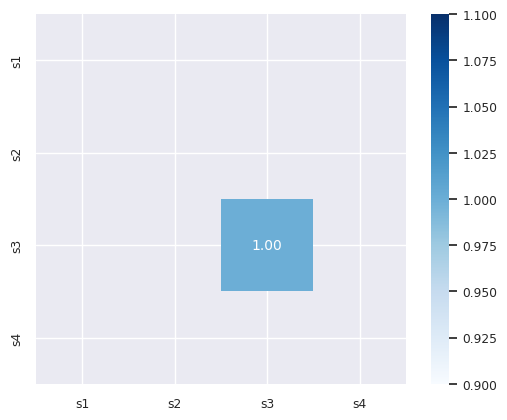

In [ ]:
names = ["s1","s2","s3","s4"]
cm = np.corrcoef(normal_[names].values.T)
sns.set(font_scale=0.8)
sns.heatmap(cm,annot=True,square=True,fmt=".2f",annot_kws={"size":10},yticklabels=names,xticklabels=names,cmap=plt.cm.Blues)


In [ ]:
M =15
normal_s1 = np.convolve(normal_['s1'], np.ones(M), 'valid') / M; normal_s1 = normal_s1.reshape(len(normal_s1),1)
normal_s2 = np.convolve(normal_['s2'], np.ones(M), 'valid') / M; normal_s2 = normal_s2.reshape(len(normal_s2),1)
normal_s3 = np.convolve(normal_['s3'], np.ones(M), 'valid') / M; normal_s3 = normal_s3.reshape(len(normal_s3),1)
normal_s4 = np.convolve(normal_['s4'], np.ones(M), 'valid') / M; normal_s4 = normal_s4.reshape(len(normal_s4),1)
type1_s1 = np.convolve(type1_['s1'], np.ones(M), 'valid') / M; type1_s1 = type1_s1.reshape(len(type1_s1),1)
type1_s2 = np.convolve(type1_['s2'], np.ones(M), 'valid') / M; type1_s2 = type1_s2.reshape(len(type1_s2),1)
type1_s3 = np.convolve(type1_['s3'], np.ones(M), 'valid') / M; type1_s3 = type1_s3.reshape(len(type1_s3),1)
type1_s4 = np.convolve(type1_['s4'], np.ones(M), 'valid') / M; type1_s4 = type1_s4.reshape(len(type1_s4),1)
type2_s1 = np.convolve(type2_['s1'], np.ones(M), 'valid') / M; type2_s1 = type2_s1.reshape(len(type2_s1),1)
type2_s2 = np.convolve(type2_['s2'], np.ones(M), 'valid') / M; type2_s2 = type2_s2.reshape(len(type2_s2),1)
type2_s3 = np.convolve(type2_['s3'], np.ones(M), 'valid') / M; type2_s3 = type2_s3.reshape(len(type2_s3),1)
type2_s4 = np.convolve(type2_['s4'], np.ones(M), 'valid') / M; type2_s4 = type2_s4.reshape(len(type2_s4),1)
type3_s1 = np.convolve(type3_['s1'], np.ones(M), 'valid') / M; type3_s1 = type3_s1.reshape(len(type3_s1),1)
type3_s2 = np.convolve(type3_['s2'], np.ones(M), 'valid') / M; type3_s2 = type3_s2.reshape(len(type3_s2),1)
type3_s3 = np.convolve(type3_['s3'], np.ones(M), 'valid') / M; type3_s3 = type3_s3.reshape(len(type3_s3),1)
type3_s4 = np.convolve(type3_['s4'], np.ones(M), 'valid') / M; type3_s4 = type3_s4.reshape(len(type3_s4),1)
normal_temp = np.concatenate((normal_s1,normal_s2,normal_s3,normal_s4), axis =1)
type1_temp = np.concatenate((type1_s1,type1_s2,type1_s3,type1_s4), axis =1)
type2_temp = np.concatenate((type2_s1,type2_s2,type2_s3,type2_s4), axis =1)
type3_temp = np.concatenate((type3_s1,type3_s2,type3_s3,type3_s4), axis =1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(normal_)
normal = scaler.transform(normal_temp)
type1 = scaler.transform(type1_temp)
type2 = scaler.transform(type2_temp)
type3 = scaler.transform(type3_temp)

/home/seonghun/.pyenv/versions/3.10.11/envs/ml-job/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/seonghun/.pyenv/versions/3.10.11/envs/ml-job/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/seonghun/.pyenv/versions/3.10.11/envs/ml-job/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/seonghun/.pyenv/versions/3.10.11/envs/ml-job/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(normal)
print('------------------------------------------------')
print('normal data size = ', normal.shape)

[[0.53528051 0.52423142 0.53157569 0.49339749]
 [0.55866971 0.52387055 0.54507424 0.50348737]
 [0.58030472 0.52387055 0.55587308 0.50399187]
 ...
 [       nan        nan 0.61003865        nan]
 [       nan        nan 0.61993759        nan]
 [       nan        nan 0.61093856        nan]]
------------------------------------------------
normal data size =  (196065, 4)


In [ ]:
normal = normal[30000:130000][:]
type1 = type1[30000:130000][:]
type2 = type2[30000:130000][:]
type3 = type3[30000:130000][:]
print(normal)
print('------------------------------------------------')
print('normal data size = ', normal.shape)

[[0.37495083 0.43533853 0.6018868  0.61060273]
 [0.38956908 0.45302083 0.61718515 0.6307825 ]
 [0.40828045 0.46673364 0.61088583 0.64137689]
 ...
 [0.65767126 0.56372127 0.60042005 0.51954053]
 [0.66527275 0.56119523 0.60491957 0.50137874]
 [0.66702694 0.56588645 0.61031899 0.51146863]]
------------------------------------------------
normal data size =  (100000, 4)


In [ ]:
# 데이터 분배
normal_train = normal[:][:60000]; normal_valid = normal[:][60000:80000]; normal_test =normal[:][80000:]
type1_train = type1[:][:60000]; type1_valid = type1[:][60000:80000]; type1_test =type1[:][80000:]
type2_train = type2[:][:60000]; type2_valid = type2[:][60000:80000]; type2_test =type2[:][80000:]
type3_train = type3[:][:60000]; type3_valid = type3[:][60000:80000]; type3_test =type3[:][80000:]
train = np.concatenate((normal_train,type1_train,type2_train,type3_train))
valid = np.concatenate((normal_valid,type1_valid,type2_valid,type3_valid))
test = np.concatenate((normal_test,type1_test,type2_test,type3_test))
print("train data의 형태:", train.shape)
print("valid data의 형태:", valid.shape)
print(" test data의 형태:", test.shape)

train data의 형태: (240000, 4)
valid data의 형태: (80000, 4)
 test data의 형태: (80000, 4)


In [ ]:
train_label = np.concatenate((np.full((60000,1),0), np.full((60000,1),1),
np.full((60000,1),2), np.full((60000,1),3)))
valid_label = np.concatenate((np.full((20000,1),0), np.full((20000,1),1),
np.full((20000,1),2), np.full((20000,1),3)))
test_label = np.concatenate((np.full((20000,1),0), np.full((20000,1),1),
np.full((20000,1),2), np.full((20000,1),3)))

In [ ]:
idx = np.arange(train.shape[0]); np.random.shuffle(idx);
train = train[:][idx]; train_label = train_label[:][idx]
idx_v = np.arange(valid.shape[0]); np.random.shuffle(idx_v);
valid = valid[:][idx_v]; valid_label = valid_label[:][idx_v]
idx_t = np.arange(test.shape[0]); np.random.shuffle(idx_t);
test = test[:][idx_t]; test_label = test_label[:][idx_t]

In [ ]:
x_train = torch.from_numpy(train).float()
y_train = torch.from_numpy(train_label).float().T[0]
x_valid = torch.from_numpy(valid).float()
y_valid = torch.from_numpy(valid_label).float().T[0]
x_test = torch.from_numpy(test).float()
y_test = torch.from_numpy(test_label).float().T[0]
print("변경 전")
train

변경 전


array([[-0.02136538,  0.32530343,  0.62511642,  0.69231459],
       [ 0.39882427,  0.62643605,  0.54787941,  0.69013503],
       [ 0.32636683,  0.70180047,  0.60264521,  0.64372941],
       ...,
       [ 0.38058227,  0.57176916,  0.51212408,  0.60941443],
       [ 0.6902768 ,  0.49299243,  0.64774231,  0.69323443],
       [ 0.93920049,  0.68385102,  0.54507425,  0.56974068]])

In [ ]:
print("변경 후")
x_train

변경 후


tensor([[-0.0214,  0.3253,  0.6251,  0.6923],
        [ 0.3988,  0.6264,  0.5479,  0.6901],
        [ 0.3264,  0.7018,  0.6026,  0.6437],
        ...,
        [ 0.3806,  0.5718,  0.5121,  0.6094],
        [ 0.6903,  0.4930,  0.6477,  0.6932],
        [ 0.9392,  0.6839,  0.5451,  0.5697]])

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
train = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train, batch_size =5000, shuffle=True)
valid = TensorDataset(x_valid, y_valid)
valid_dataloader = DataLoader(valid, batch_size =len(x_valid), shuffle=False)
test = TensorDataset(x_test, y_test)
test_dataloader = DataLoader(test, batch_size =len(x_valid), shuffle=False)

In [ ]:
class KAMP_DNN(nn.Module):
    def __init__(self):
        super(KAMP_DNN, self).__init__()
        self.layer1 = nn.Linear(in_features =4, out_features =100)
        self.layer2 = nn.Linear(in_features =100, out_features =100)
        self.layer3 = nn.Linear(in_features =100, out_features =100)
        self.layer4 = nn.Linear(in_features =100, out_features =4)

        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
    def forward(self, input):
        out =self.layer1(input)
        out =self.relu(out)
        out =self.dropout(out)

        out =self.layer2(out)
        out =self.relu(out)
        out =self.dropout(out)

        out =self.layer3(out)
        out =self.relu(out)
        out =self.dropout(out)

        out =self.layer4(out)
        return out

model_check = KAMP_DNN()
print(model_check)

KAMP_DNN(
  (layer1): Linear(in_features=4, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (relu): ReLU()
)


In [ ]:
# layer를 더 늘리고 싶은 경우 주석을 제거하고 사용합니다.
class KAMP_CNN(nn.Module):
    def __init__(self):
        super(KAMP_CNN, self).__init__()
        self.conv1 = nn.Sequential(
        nn.Conv1d(in_channels=1, out_channels=100, kernel_size=2, stride=1, padding='same'),
        nn.BatchNorm1d(100),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=1, stride=1),
        nn.Dropout(p=0.2))

        # self.conv2 = nn.Sequential(
        # nn.Conv1d(in_channels=100, out_channels=100, kernel_size=2, stride=1, padding='same'),
        # nn.BatchNorm1d(100),
        # nn.ReLU(),
        # nn.MaxPool1d(kernel_size=1, stride=1),
        # nn.Dropout(p=0.2))

        # self.conv3 = nn.Sequential(
        # nn.Conv1d(in_channels=100, out_channels=100, kernel_size=2, stride=1, padding='same'),
        # nn.BatchNorm1d(100),
        # nn.ReLU(),
        # nn.MaxPool1d(kernel_size=1, stride=1),
        # nn.Dropout(p=0.2))

        self.conv4 = nn.Sequential(
        nn.Conv1d(in_channels=100, out_channels=4, kernel_size=2, stride=1, padding='same'),
        nn.BatchNorm1d(4),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=1, stride=1))

        self.final_pool = nn.AdaptiveAvgPool1d(1)
        self.linear = nn.Linear(4, 4)
    def forward(self, input):
        input = input.unsqueeze(1)
        out =self.conv1(input)
        # out = self.conv2(out)
        # out = self.conv3(out)
        out =self.conv4(out)
        out =self.final_pool(out)
        out =self.linear(out.squeeze(-1))
        return out
model_check = KAMP_CNN()
print(model_check)

KAMP_CNN(
  (conv1): Sequential(
    (0): Conv1d(1, 100, kernel_size=(2,), stride=(1,), padding=same)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
  )
  (conv4): Sequential(
    (0): Conv1d(100, 4, kernel_size=(2,), stride=(1,), padding=same)
    (1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (final_pool): AdaptiveAvgPool1d(output_size=1)
  (linear): Linear(in_features=4, out_features=4, bias=True)
)


In [ ]:
print('--------------------------------------------------------------------')
input = torch.tensor([[[0.0, 6.0, 9.0, 1.0]]])
print('"input is same below."')
print(input)
print('--------------------------------------------------------------------')
model = nn.Conv1d(1, 4, 2, bias =False)
model.weight.data = torch.zeros(model.weight.data.size())
model.weight.data[:, :, :2] =1
print('"kernal is same below."')
print(model.weight.data)
print('--------------------------------------------------------------------')
output = model(input)
print('"output is same below (without bias)."')
print(output)
print('--------------------------------------------------------------------')
model1 = nn.Conv1d(1, 4, 2)
model1.weight.data = torch.zeros(model1.weight.data.size())
model1.weight.data[:, :, :2] =1
output = model1(input)
print('"output is same below (with bias)."')
print(output)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
"input is same below."
tensor([[[0., 6., 9., 1.]]])
--------------------------------------------------------------------
"kernal is same below."
tensor([[[1., 1.]],

        [[1., 1.]],

        [[1., 1.]],

        [[1., 1.]]])
--------------------------------------------------------------------
"output is same below (without bias)."
tensor([[[ 6., 15., 10.],
         [ 6., 15., 10.],
         [ 6., 15., 10.],
         [ 6., 15., 10.]]], grad_fn=<ConvolutionBackward0>)
--------------------------------------------------------------------
"output is same below (with bias)."
tensor([[[ 6.3288, 15.3288, 10.3288],
         [ 6.4611, 15.4611, 10.4611],
         [ 5.7150, 14.7150,  9.7150],
         [ 6.3190, 15.3190, 10.3190]]], grad_fn=<ConvolutionBackward0>)
--------------------------------------------------------------------


In [ ]:
import torch
import torch.nn as nn
class KAMP_RNN(nn.Module):
    def __init__(self):
        super(KAMP_RNN, self).__init__()
        self.lstm = nn.LSTM(input_size =4, hidden_size =100, num_layers =2,
        batch_first=True, dropout =0.2)
        self.fc = nn.Linear(in_features =100, out_features =4)
    def forward(self, input):
        input = input.unsqueeze(1)
        out, _ =self.lstm(input)
        out = out.view(-1,100)
        output =self.fc(out)
        return output

model_check = KAMP_RNN()
print(model_check)

KAMP_RNN(
  (lstm): LSTM(4, 100, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=4, bias=True)
)


In [ ]:
def train_model(model, criterion, optimizer, num_epoch, train_dataloader, PATH):
 loss_values = []
 loss_values_v = []
 check =0; accuracy_past =0
 for epoch in range(1, num_epochs +1):
    #---------------------- 모델 학습 ---------------------#
    model.train()
    batch_number =0
    running_loss =0.0
    for batch_idx, samples in enumerate(train_dataloader):
        x_train, y_train = samples
        # 변수 초기화
        optimizer.zero_grad()
        y_hat = model.forward(x_train)
        loss = criterion(y_hat,y_train.long())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        batch_number +=1
    loss_values.append(running_loss / batch_number)
 #---------------------- 모델 검증 ---------------------#
    model.eval()
    accuracy =0.0
    total =0.0
    for batch_idx, data in enumerate(valid_dataloader):
        x_valid, y_valid = data

        v_hat = model.forward(x_valid)
        v_loss = criterion(v_hat,y_valid.long())
        _, predicted = torch.max(v_hat.data, 1)
        total += y_valid.size(0)
        accuracy += (predicted == y_valid).sum().item()
    loss_values_v.append(loss.item())
    accuracy = (accuracy / total)
 #----------------Check for early stopping---------------#
    if epoch % 1 ==0:
        print('[Epoch {}/{}] [Train_Loss: {:.6f} /Valid_Loss: {:.6f}]'.format(epoch, num_epochs, loss.item(),v_loss.item()))
        print('[Epoch {}/{}] [Accuracy : {:.6f}]'.format(epoch, num_epochs, accuracy))
    if accuracy_past > accuracy:
        check +=1
    else:
        check =0
        accuracy_past = accuracy
    if check >50:
        print('This is time to do early stopping')
 torch.save(model, PATH +'model.pt')
 return loss_values, loss_values_v

In [ ]:
CNN_model = KAMP_CNN()
num_epochs =100
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNN_model.parameters())
PATH ='save/CNN/'
CNN_loss_values, CNN_loss_values_v = train_model(CNN_model, criterion, optimizer,
num_epochs, train_dataloader, PATH)

[Epoch 1/100] [Train_Loss: 1.278664 /Valid_Loss: 1.320040]
[Epoch 1/100] [Accuracy : 0.415388]
[Epoch 2/100] [Train_Loss: 1.217678 /Valid_Loss: 1.220629]
[Epoch 2/100] [Accuracy : 0.466612]
[Epoch 3/100] [Train_Loss: 1.175091 /Valid_Loss: 1.169529]
[Epoch 3/100] [Accuracy : 0.466763]
[Epoch 4/100] [Train_Loss: 1.130964 /Valid_Loss: 1.126126]
[Epoch 4/100] [Accuracy : 0.469425]
[Epoch 5/100] [Train_Loss: 1.104068 /Valid_Loss: 1.089883]
[Epoch 5/100] [Accuracy : 0.482525]
[Epoch 6/100] [Train_Loss: 1.072822 /Valid_Loss: 1.060980]
[Epoch 6/100] [Accuracy : 0.500188]
[Epoch 7/100] [Train_Loss: 1.043089 /Valid_Loss: 1.030765]
[Epoch 7/100] [Accuracy : 0.524025]
[Epoch 8/100] [Train_Loss: 1.016392 /Valid_Loss: 1.013287]
[Epoch 8/100] [Accuracy : 0.527650]
[Epoch 9/100] [Train_Loss: 1.001906 /Valid_Loss: 0.992468]
[Epoch 9/100] [Accuracy : 0.549937]
[Epoch 10/100] [Train_Loss: 0.991861 /Valid_Loss: 0.979429]
[Epoch 10/100] [Accuracy : 0.559225]
[Epoch 11/100] [Train_Loss: 0.962450 /Valid_Loss

In [30]:
RNN_model = KAMP_RNN()
num_epochs =100
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(RNN_model.parameters())
PATH ='save/RNN/'
RNN_loss_values, RNN_loss_values_v = train_model(RNN_model, criterion, optimizer,
num_epochs, train_dataloader, PATH)

[Epoch 1/100] [Train_Loss: 1.386207 /Valid_Loss: 1.386282]
[Epoch 1/100] [Accuracy : 0.250000]
[Epoch 2/100] [Train_Loss: 1.385952 /Valid_Loss: 1.386222]
[Epoch 2/100] [Accuracy : 0.250000]
[Epoch 3/100] [Train_Loss: 1.383498 /Valid_Loss: 1.383132]
[Epoch 3/100] [Accuracy : 0.342125]
[Epoch 4/100] [Train_Loss: 1.194478 /Valid_Loss: 1.185797]
[Epoch 4/100] [Accuracy : 0.437100]
[Epoch 5/100] [Train_Loss: 1.102644 /Valid_Loss: 1.095598]
[Epoch 5/100] [Accuracy : 0.407600]
[Epoch 6/100] [Train_Loss: 1.103738 /Valid_Loss: 1.092815]
[Epoch 6/100] [Accuracy : 0.420500]
[Epoch 7/100] [Train_Loss: 1.092280 /Valid_Loss: 1.089178]
[Epoch 7/100] [Accuracy : 0.450300]
[Epoch 8/100] [Train_Loss: 1.086106 /Valid_Loss: 1.086352]
[Epoch 8/100] [Accuracy : 0.484000]
[Epoch 9/100] [Train_Loss: 1.076682 /Valid_Loss: 1.082448]
[Epoch 9/100] [Accuracy : 0.452763]
[Epoch 10/100] [Train_Loss: 1.089235 /Valid_Loss: 1.080277]
[Epoch 10/100] [Accuracy : 0.465125]
[Epoch 11/100] [Train_Loss: 1.078341 /Valid_Loss

In [32]:
def test_model(model, PATH):
    model = torch.load(PATH +'model.pt')
    #---------------------- 모델 시험 ---------------------#
    model.eval()
    total =0.0
    accuracy =0.0
    for batch_idx, data in enumerate(test_dataloader):
        x_test, y_test = data

        t_hat = model(x_test)
        _, predicted = torch.max(t_hat.data, 1)
        total += y_test.size(0)
        accuracy += (predicted == y_test).sum().item()
    accuracy = (accuracy / total)
    #------------------------------------------------------#
    print(accuracy)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
def draw_confusion_matrix(model, xt, yt, PATH):
    y_pred = []; y_true = []
    model.eval()
    y_hat = model(xt); output = (torch.max(torch.exp(y_hat), 1)[1]).data.cpu().numpy()
    y_pred.extend(output)
    labels = y_test.data.cpu().numpy()
    y_true.extend(labels)
    # 분류 항목
    classes = ('Normal', 'Type1', 'Type2', 'Type3')
    # Confussion Matrix 생성
    plt.figure(figsize = (7,5))
    dlen = float(len(x_test)) # test data 크기 : 여기서는 80000
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm/dlen, index = [i for i in classes],columns = [i for i in classes])
    sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix", size=24, fontweight='bold')
    plt.xlabel("Predicted Label", size=16); plt.ylabel("Actual Label", size=16)
    plt.rc('xtick', labelsize=12); plt.rc('ytick', labelsize=12); plt.yticks(rotation=0)
    plt.savefig(PATH +'cm_output.png')

In [34]:
def plot_loss_graph(loss_values, loss_values_v):
    plt.figure()
    plt.plot(loss_values)
    plt.plot(loss_values_v)
    plt.title("Training & Validation Loss")
    plt.ylabel("loss", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"])
    plt.tight_layout()
    # 결과 저장
    plt.savefig(PATH +'lossplot_output.png')

In [38]:
test_model(CNN_model,'save/CNN/')
test_model(RNN_model,'save/RNN/')

0.75495
0.6295625


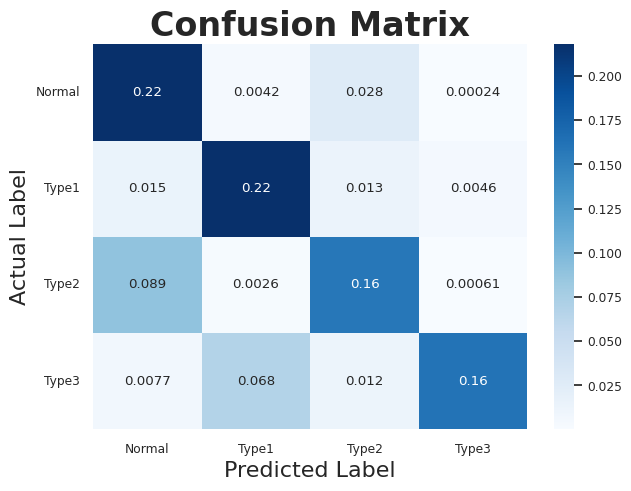

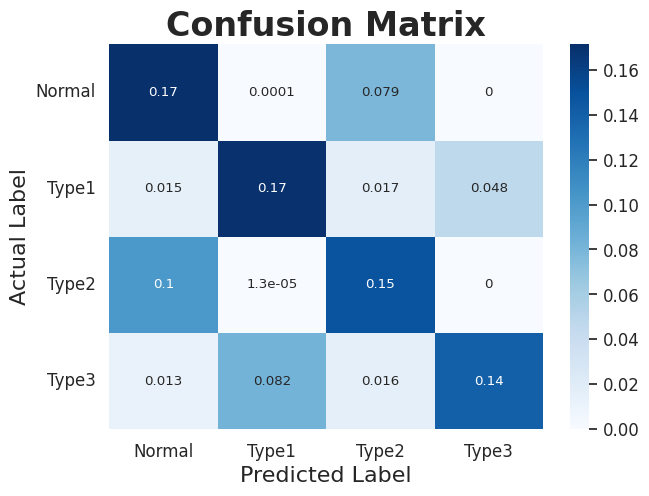

In [39]:
draw_confusion_matrix(CNN_model, x_test, y_test, 'save/CNN/')
draw_confusion_matrix(RNN_model, x_test, y_test, 'save/RNN/')

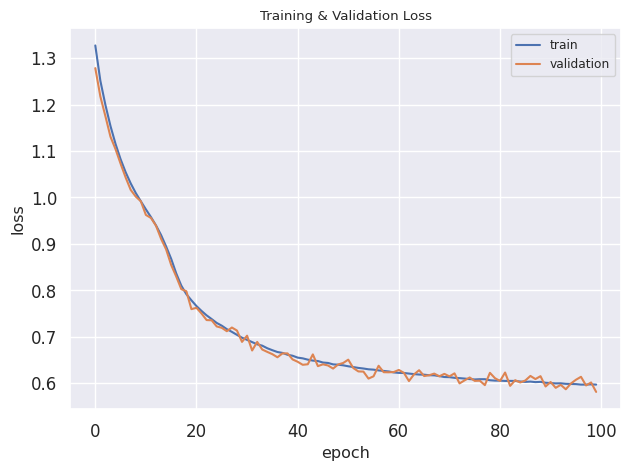

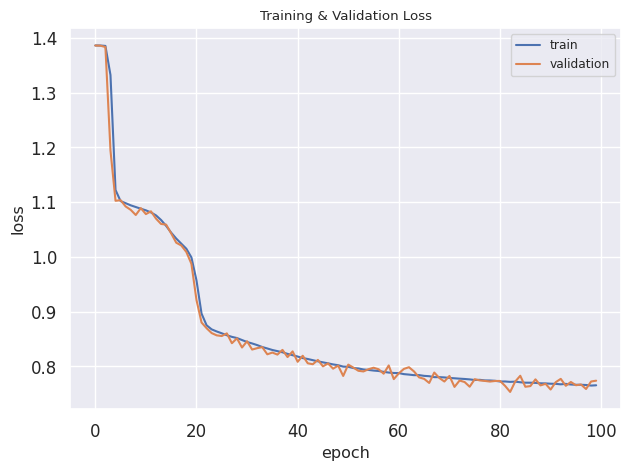

In [40]:
plot_loss_graph(CNN_loss_values, CNN_loss_values_v)
plot_loss_graph(RNN_loss_values, RNN_loss_values_v)